Hello!

Here's a brief example of modeling on the wine quality dataset. This example is not intended to be an in-depth analysis, as our class does not require such extensive work. Instead, it serves as a simple illustration for our classmates.

You can get the data from here!

This project was created by Dalton Anderson, Michael Lucido, Kawther Abdelmotaleb, William Dorkowski

In [316]:
import pandas as pd
#load the dataset
print('Hello World!')
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=";")

Hello World!


# Project Roadmap

1. Import project libraries

2. Data Wrangling

3. Modeling Examples
- Decision Tree Model
    - Decision Tree on wine type
    - Decision Tree on wine quality
- Netural Network Model
    - Netural Network on type
    - Netural Network on quality
- K-means Model
- Random Forest Model
    - Random Forest on type
    - Random Forest on quality


## Import Project Libraries

In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Import project data

In [318]:
#read in data from the CSV file
df = pd.read_csv('/Users/daltonanderson/Documents/USF/Spring-2023/ISM6136 Data Mining/Final Project on Wine Quality/red_or_white_wine.csv')
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,white


## Data Wrangling

Check for nulls

In [319]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

No nulls

In [320]:
df.duplicated().sum()

1177

We need to drop the duplicates

In [321]:
#drop the duplicates
df = df.drop_duplicates()

#check results
df.duplicated().sum()

0

The issue is fixed now!

In [322]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

Check for outliers

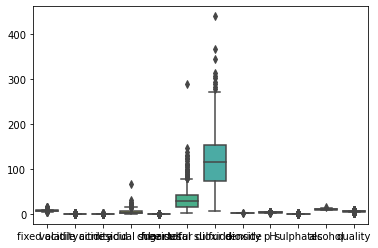

<Figure size 3600x1440 with 0 Axes>

In [323]:
# create box plot
sns.boxplot(data=df)

# adjust plot size
plt.figure(figsize=(50, 20))

# show plot
plt.show()


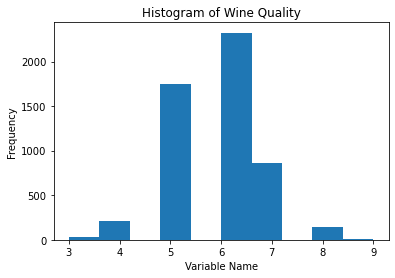

In [324]:
# create histogram of a single variable
plt.hist(df['quality'], bins=10)

# add labels and title
plt.xlabel('Variable Name')
plt.ylabel('Frequency')
plt.title('Histogram of Wine Quality')

# display histogram
plt.show()

There is a big drop off of observations in the tails of the data. Also, seems wines past 7 are high quality and 8-9 are sublime. 

Check for correlation

<AxesSubplot:>

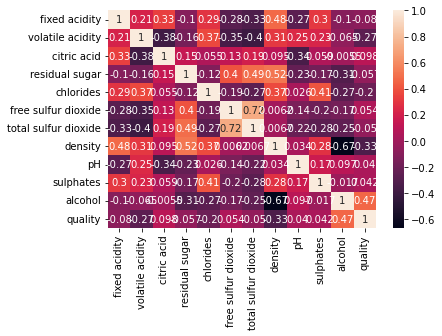

In [325]:
sns.heatmap(df.corr(), annot=True)

I encourage the group to share their thoughts on the correlation matrix. It appears that there are variables that we should consider removing. At the very least, we could drop either 'free sulfur dioxide' or 'total sulfur dioxide'. Additionally, we should examine the relationship between 'sugar' and 'density', as well as 'density' and 'alcohol'. A few variables, such as 'citric acid', that could potentially be dropped.

However, due to time constraints, I will drop the following columns: 'pH', 'total sulfur dioxide', 'density', and 'citric acid'. Typically, running models on various combinations of column sets would be beneficial. One model could include all variables, commonly known as a "kitchen sink" model. Another model could incorporate fewer variables, while another model might use a different combination of variables. This approach would help us better understand the impact of each variable on the model's performance and make a more informed decision on which variables to retain.

Final touch-up before modeling

In [326]:
#turn type into a binary

# convert categorical column to binary format
df['type_binary'] = df['type'].map({'white': 1, 'red': 0})

#drop column
df.drop(['type', 'pH', 'total sulfur dioxide', 'density', 'citric acid'], axis=1, inplace=True)

df.sort_values(by='quality', ascending=False, inplace=True)

#create binary column based on quality, many of the wines have a quality score of 6 and below, thus making me belive 7 is high quality
df['quality_binary'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

#drop quality
df.drop('quality', axis=1, inplace=True)

# Export df to a CSV
df.to_csv('wine_data.csv', index=False)
df.head(5)

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol,type_binary,quality_binary
774,9.1,0.27,10.6,0.035,28.0,0.46,10.4,1,1
820,6.6,0.36,1.6,0.021,24.0,0.61,12.4,1,1
1605,7.1,0.26,2.2,0.032,31.0,0.42,12.9,1,1
876,6.9,0.36,4.2,0.018,57.0,0.36,12.7,1,1
827,7.4,0.24,2.0,0.031,27.0,0.48,12.5,1,1


## Decision Tree Model

### Decision Tree on wine type

Confusion Matrix:
 [[254  22]
 [ 19 769]]
Accuracy: 0.9614661654135338
Precision: 0.9721871049304678
Recall: 0.9758883248730964
F1 Score: 0.9740341988600381
ROC AUC: 0.9486730302361509
Log Loss: 1.299118227556816


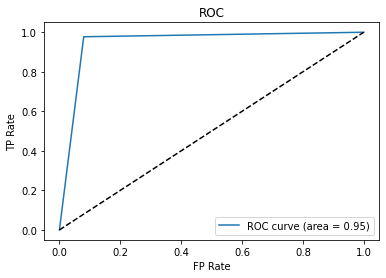

In [344]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, roc_curve, log_loss, classification_report)

#split data into X (features) and y (target variable)
X = df.drop('type_binary', axis=1) # remove target variable from features
y = df['type_binary'] # extract target variable

#assign feature names
feature_names = X.columns.tolist()
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6136)

#create decision tree model
dt_model = DecisionTreeClassifier(random_state=6136)

#train decision tree model
dt_model.fit(X_train, y_train)
#train decision tree model
dt_model.fit(X_train, y_train)
#make predictions on the testing data
y_pred = dt_model.predict(X_test)
y_pred_prob = dt_model.predict_proba(X_test)[:, 1]

#calculate evaluation metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
logloss = log_loss(y_test, y_pred_prob)

#print evaluation metrics
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("Log Loss:", logloss)

#plot ROC curve
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### Decision Tree on wine quality

Confusion Matrix:
 [[724 131]
 [116  93]]
Accuracy: 0.7678571428571429
Precision: 0.41517857142857145
Recall: 0.4449760765550239
F1 Score: 0.4295612009237875
ROC AUC: 0.645879851143009
Log Loss: 8.018028681208921


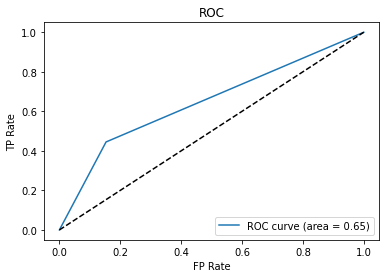

In [343]:
#split data into X (features) and y (target variable)
X = df.drop('quality_binary', axis=1) # remove target variable from features
y = df['quality_binary'] # extract target variable
#assign feature names
feature_names = X.columns.tolist()


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6136)

#create decision tree model
dt_model = DecisionTreeClassifier(random_state=6136)

#train decision tree model
dt_model.fit(X_train, y_train)
#make predictions on the testing data
y_pred = dt_model.predict(X_test)
y_pred_prob = dt_model.predict_proba(X_test)[:, 1]

#calculate evaluation metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
logloss = log_loss(y_test, y_pred_prob)

#print evaluation metrics
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("Log Loss:", logloss)

#plot ROC curve
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## Netual Network Models

tensorflow is crashing my kernel, but this is how you do it.

I will try sklearn

### Netural Network on wine type

In [329]:
#!pip install tensorflow

In [330]:
"""import tensorflow as tf
from tensorflow import keras

#split data into X (features) and y (target variable)
X = df.drop('type_binary', axis=1) # remove target
y = df['type_binary'] # extract target
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6136)

#standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#create neural network model
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dense(1, activation='sigmoid')
])

#compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#train model
model.fit(X_train, y_train, epochs=50, validation_split=0.2)

#evaluate model performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)"""

"import tensorflow as tf\nfrom tensorflow import keras\n\n#split data into X (features) and y (target variable)\nX = df.drop('type_binary', axis=1) # remove target\ny = df['type_binary'] # extract target\n# split data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6136)\n\n#standardize data\nscaler = StandardScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)\n\n#create neural network model\nmodel = keras.Sequential([\n    keras.layers.Dense(32, activation='relu', input_shape=[X_train.shape[1]]),\n    keras.layers.Dense(1, activation='sigmoid')\n])\n\n#compile model\nmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])\n\n#train model\nmodel.fit(X_train, y_train, epochs=50, validation_split=0.2)\n\n#evaluate model performance\ntest_loss, test_acc = model.evaluate(X_test, y_test)\nprint('Test Accuracy:', test_acc)"

### Netural Network on type

Confusion Matrix:
 [[262  14]
 [ 10 778]]
Accuracy: 0.9774436090225563
Precision: 0.9823232323232324
Recall: 0.9873096446700508
F1 Score: 0.9848101265822785
ROC AUC: 0.9929007577429558
Log Loss: 0.073113740419805


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (74) reached and the optimization hasn't converged yet.
  warnings.warn(


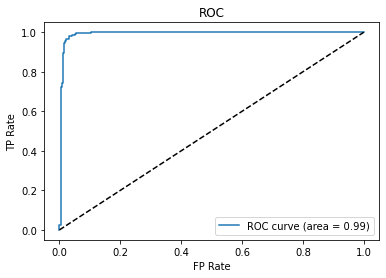

In [331]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#split data into X (features) and y (target variable)
X = df.drop('type_binary', axis=1) # remove target
y = df['type_binary'] # extract target
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6136)

#standardize data - transforming the data to a zero unit mean.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#create neural network model
model = MLPClassifier(hidden_layer_sizes=(32,), activation='relu', solver='adam', max_iter=74)

#train model
model.fit(X_train, y_train)

#make predictions on the testing data
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

#calculate evaluation metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
logloss = log_loss(y_test, y_pred_prob)

#print evaluation metrics
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("Log Loss:", logloss)

#plot ROC curve
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### Netural Network on quality

In [332]:
"""#split data into X (features) and y (target variable)
X = df.drop('quality_binary', axis=1) # remove target
y = df['quality_binary'] # extract target

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6136)

#standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#create neural network model
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dense(1, activation='sigmoid')
])

#compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#train model
model.fit(X_train, y_train, epochs=50, validation_split=0.2)

#evaluate model performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc) """

"#split data into X (features) and y (target variable)\nX = df.drop('quality_binary', axis=1) # remove target\ny = df['quality_binary'] # extract target\n\n# split data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6136)\n\n#standardize data\nscaler = StandardScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)\n\n#create neural network model\nmodel = keras.Sequential([\n    keras.layers.Dense(32, activation='relu', input_shape=[X_train.shape[1]]),\n    keras.layers.Dense(1, activation='sigmoid')\n])\n\n#compile model\nmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])\n\n#train model\nmodel.fit(X_train, y_train, epochs=50, validation_split=0.2)\n\n#evaluate model performance\ntest_loss, test_acc = model.evaluate(X_test, y_test)\nprint('Test Accuracy:', test_acc) "

Confusion Matrix:
 [[815  40]
 [132  77]]
Accuracy: 0.8383458646616542
Precision: 0.6581196581196581
Recall: 0.3684210526315789
F1 Score: 0.4723926380368098
ROC AUC: 0.8596043537871793
Log Loss: 0.3518436337291173


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (71) reached and the optimization hasn't converged yet.
  warnings.warn(


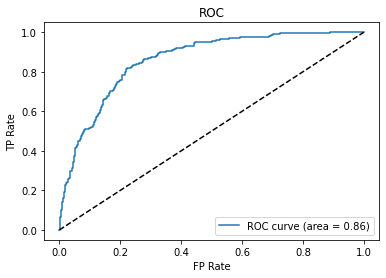

In [333]:
#split data into X (features) and y (target variable)
X = df.drop('quality_binary', axis=1) # remove target
y = df['quality_binary'] # extract target
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6136)

#standardize data - transforming the data to a zero unit mean.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#create neural network model
model = MLPClassifier(hidden_layer_sizes=(32,), activation='relu', solver='adam', max_iter=71)

#train model
model.fit(X_train, y_train)

#make predictions on the testing data
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

#calculate evaluation metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
logloss = log_loss(y_test, y_pred_prob)

#print evaluation metrics
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("Log Loss:", logloss)

#plot ROC curve
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## Regression Model

### Regression Model on quality

In [334]:
from sklearn.linear_model import LinearRegression
#bring in the dataset again to get quality as a number
df_reg = pd.read_csv('/Users/daltonanderson/Documents/USF/Spring-2023/ISM6136 Data Mining/Final Project on Wine Quality/red_or_white_wine.csv')
# split data into X (features) and y (target variable)
X = df_reg.drop(['type','quality'], axis=1) # remove target variable from features
y = df_reg['quality'] # extract target variable

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6136)

# standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create linear regression model
model = LinearRegression()

# train model
model.fit(X_train, y_train)

# evaluate model performance
test_score = model.score(X_test, y_test)
print('Test Score:', test_score)

Test Score: 0.29844231010323774


This is an example of using the wrong tool for the job.

In [335]:
df.head(2)


,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol,type_binary,quality_binary
774,9.1,0.27,10.6,0.035,28.0,0.46,10.4,1,1
820,6.6,0.36,1.6,0.021,24.0,0.61,12.4,1,1


## K-means Model

In [336]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#select features for clustering
X = df_reg[['quality', 'alcohol', 'volatile acidity']]

#standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#create k-means
model = KMeans(n_clusters=3, random_state=6136)

#fit the model
model.fit(X_scaled)

#get cluster labels for each data point
labels = model.labels_

#get cluster centers
centers = model.cluster_centers_

#print the labels and centers
print('Cluster Labels:', labels)
print('Cluster Centers:', centers)

Cluster Labels: [1 1 1 ... 2 2 0]
Cluster Centers: [[ 0.87928569  1.06121279 -0.29545799]
 [-0.36189459 -0.60799567 -0.4255497 ]
 [-0.67020739 -0.34207598  1.71688233]]


In [337]:
#code k-means code from Thiago Carvalho
#https://towardsdatascience.com/visualizing-clusters-with-pythons-matplolib-35ae03d87489

from sklearn.cluster import KMeans
import numpy as np
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df_reg['cluster'] = kmeans.fit_predict(df_reg[['alcohol', 'volatile acidity' ]])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df_reg['cen_x'] = df_reg.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df_reg['cen_y'] = df_reg.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df_reg['c'] = df_reg.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

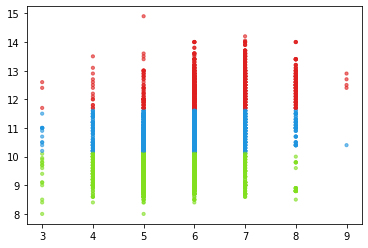

In [338]:
import matplotlib.pyplot as plt
plt.scatter(df_reg.quality, df_reg.alcohol, c=df_reg.c, alpha = 0.6, s=10)

## Random Forest Model

### Random Forest on wine quality

Confusion Matrix:
 [[844  11]
 [181  28]]
Accuracy: 0.8195488721804511
Precision: 0.717948717948718
Recall: 0.1339712918660287
F1 Score: 0.22580645161290325
ROC AUC: 0.8603542348694703
Log Loss: 0.3710222429975368


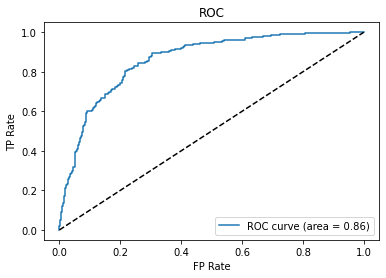

In [339]:
from sklearn.ensemble import RandomForestClassifier

#split data into training and testing sets
X = df.drop('quality_binary', axis=1)
y = df['quality_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6136)

#create random forest classifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=6136)

#fit the model to the training data
model.fit(X_train, y_train)

#make predictions on the testing data
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

#calculate evaluation metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
logloss = log_loss(y_test, y_pred_prob)

#print evaluation metrics
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("Log Loss:", logloss)

#plot ROC curve
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### Random Forest on wine type

Confusion Matrix:
 [[258  18]
 [  8 780]]
Accuracy: 0.9755639097744361
Precision: 0.9774436090225563
Recall: 0.9898477157360406
F1 Score: 0.9836065573770493
ROC AUC: 0.9929513352460826
Log Loss: 0.11208587589734713


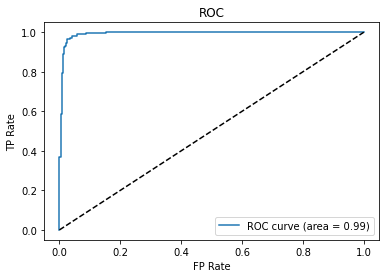

In [340]:
from sklearn.ensemble import RandomForestClassifier

#split data into training and testing sets
X = df.drop('type_binary', axis=1)
y = df['type_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6136)

#create random forest classifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=6136)

#fit the model to the training data
model.fit(X_train, y_train)

#make predictions on the testing data
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

#calculate evaluation metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
logloss = log_loss(y_test, y_pred_prob)

#print evaluation metrics
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("Log Loss:", logloss)

#plot ROC curve
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

### Logistic Regression on wine quality

Confusion Matrix:
 [[805  42]
 [153  64]]
Accuracy: 0.8167293233082706
Precision: 0.6037735849056604
Recall: 0.29493087557603687
F1 Score: 0.39628482972136225
ROC AUC: 0.82490655553077
Log Loss: 0.39160343286225496


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


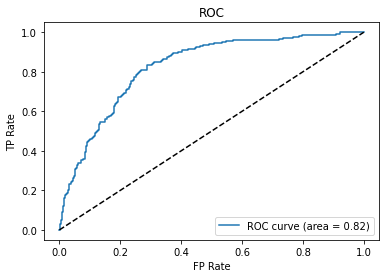

In [341]:
from sklearn.linear_model import LogisticRegression

#split data into training and testing sets
X = df.drop('quality_binary', axis=1)
y = df['quality_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create logistic regression classifier
model = LogisticRegression(random_state=42)

#fit the model to the training data
model.fit(X_train, y_train)

#make predictions on the testing data
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

#calculate evaluation metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
logloss = log_loss(y_test, y_pred_prob)

#print evaluation metrics
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("Log Loss:", logloss)

#plot ROC curve
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

This a great example why you should focus on F1 score not model accuracy 

### Logistic Regression on wine type

Confusion Matrix:
 [[238  42]
 [ 14 770]]
Accuracy: 0.9473684210526315
Precision: 0.9482758620689655
Recall: 0.9821428571428571
F1 Score: 0.9649122807017544
ROC AUC: 0.9756969752186588
Log Loss: 0.1668888274716018


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


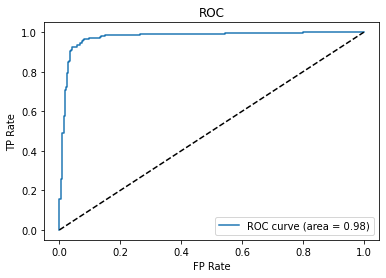

In [342]:
#split data into training and testing sets
X = df.drop('type_binary', axis=1)
y = df['type_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create logistic regression classifier
model = LogisticRegression(random_state=42)

#fit the model to the training data
model.fit(X_train, y_train)

#make predictions on the testing data
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

#calculate evaluation metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
logloss = log_loss(y_test, y_pred_prob)

#print evaluation metrics
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("Log Loss:", logloss)

#plot ROC curve
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()